In [20]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.5
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/client/session.py:1768: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


In [21]:
import tensorflow as tf
print(tf.__version__)


2.8.2


In [22]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.densenet import DenseNet121
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.python.keras import layers, models
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob

In [23]:
from google.colab import drive
drive.mount('/ShardDrives/',force_remount=True)

Mounted at /ShardDrives/


In [24]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = '/ShardDrives/MyDrive/ds/train'
valid_path = '/ShardDrives/MyDrive/ds/test'

In [25]:
img_height, img_width = 224,224

In [26]:
denseNet121 = DenseNet121(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [27]:
for layer in denseNet121.layers:
    layer.trainable = False

In [28]:
# useful for getting number of output classes
folders = glob('/ShardDrives/MyDrive/ds/train/*')

In [29]:
folders

['/ShardDrives/MyDrive/ds/train/n',
 '/ShardDrives/MyDrive/ds/train/v',
 '/ShardDrives/MyDrive/ds/train/b']

In [30]:
# our layers - you can add more if you want
x = Flatten()(denseNet121.output)

In [31]:
len(folders)

3

In [32]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=denseNet121.input, outputs=prediction)

In [33]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 zero_padding2d_2 (ZeroPadding2  (None, 230, 230, 3)  0          ['input_2[0][0]']                
 D)                                                                                               
                                                                                                  
 conv1/conv (Conv2D)            (None, 112, 112, 64  9408        ['zero_padding2d_2[0][0]']       
                                )                                                           

In [34]:
from tensorflow.keras.optimizers import Adam
adam_fine = Adam(learning_rate=0.00002)

In [35]:
# tell the model what cost and optimization method to use
model.compile(
  loss = 'categorical_crossentropy',
  optimizer= adam_fine,
  metrics=['accuracy']
)

In [36]:
batch_size = 32

In [37]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale= 1./ 255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale= 1./ 255,
                                  shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

In [38]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('/ShardDrives/MyDrive/ds/train',
                                                 target_size = (img_height, img_width),
                                                 batch_size = batch_size,
                                                 class_mode = 'categorical',shuffle=False)

Found 7068 images belonging to 3 classes.


In [39]:
test_set = test_datagen.flow_from_directory('/ShardDrives/MyDrive/ds/test',
                                            target_size = (img_height, img_width),
                                            batch_size = batch_size,
                                            class_mode = 'categorical',shuffle=False)

Found 771 images belonging to 3 classes.


In [40]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs =100,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/100
221/221 [==============================] - 1684s 8s/step - loss: 1.0384 - accuracy: 0.5601 - val_loss: 0.9181 - val_accuracy: 0.6018
Epoch 2/100
221/221 [==============================] - 91s 410ms/step - loss: 0.6781 - accuracy: 0.7207 - val_loss: 0.7187 - val_accuracy: 0.7017
Epoch 3/100
221/221 [==============================] - 91s 410ms/step - loss: 0.6153 - accuracy: 0.7561 - val_loss: 0.6653 - val_accuracy: 0.7224
Epoch 4/100
221/221 [==============================] - 91s 411ms/step - loss: 0.5759 - accuracy: 0.7732 - val_loss: 0.6546 - val_accuracy: 0.7484
Epoch 5/100
221/221 [==============================] - 91s 412ms/step - loss: 0.5273 - accuracy: 0.7825 - val_loss: 0.6284 - val_accuracy: 0.7639
Epoch 6/100
221/221 [==============================] - 91s 410ms/step - loss: 0.4937 - accuracy: 0.7968 - val_loss: 0.6651 - val_accuracy: 0.7263
Epoch 7/100
221/221 [==============================] - 91s 412ms/step - loss: 0.4890 - accuracy: 0.7951 - val_loss: 0.5799 - 

In [41]:
import matplotlib.pyplot as plt

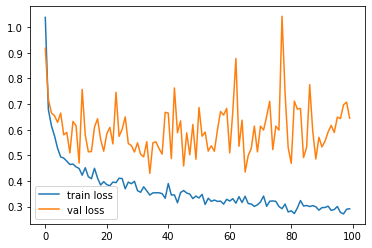

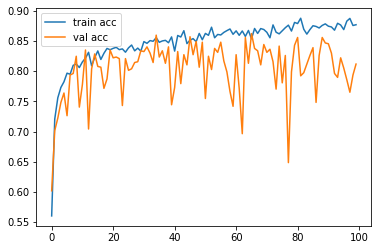

<Figure size 432x288 with 0 Axes>

In [42]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [43]:

# save it as a h5 file


from tensorflow.keras.models import load_model

FLOW1_model=model.save('densenet100.h5')

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.785422 to fit



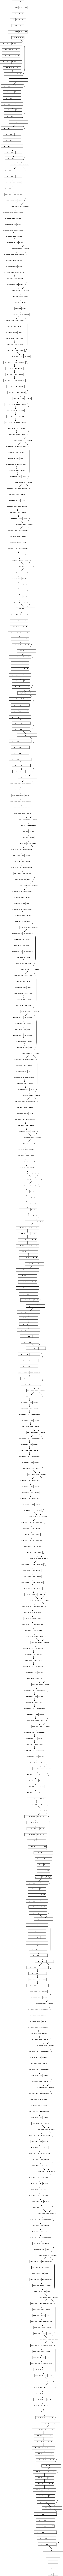

In [44]:
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='model.png')

In [45]:
model1 = load_model('densenet100.h5')

In [46]:
Y_pred = model1.predict_generator(test_set)
y_pred = np.argmax(Y_pred, axis=1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  """Entry point for launching an IPython kernel.


In [47]:
from sklearn.metrics import confusion_matrix,classification_report
cm = confusion_matrix(test_set.classes, y_pred)
print('Confusion matrix : \n',cm)

Confusion matrix : 
 [[232   1   9]
 [ 42 211  52]
 [ 49   2 173]]


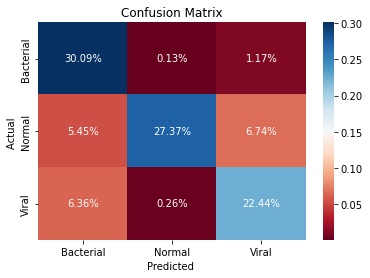

In [48]:
import seaborn as sns
ax=sns.heatmap(cm/np.sum(cm),annot=True,cmap='RdBu',fmt='.2%')
ax.set_title('Confusion Matrix')
ax.set_xlabel('Predicted ')
ax.set_ylabel('Actual ')
## For the Tick Labels, the labels should be in Alphabetical order
ax.xaxis.set_ticklabels(['Bacterial','Normal', 'Viral'])
ax.yaxis.set_ticklabels(['Bacterial','Normal', 'Viral'])
plt.show()

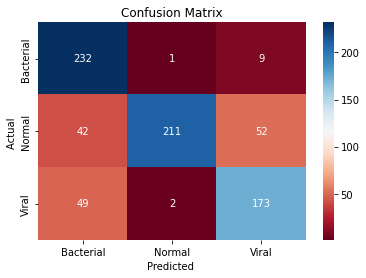

In [49]:
import seaborn as sns
ax=sns.heatmap(cm,annot=True,cmap='RdBu',fmt='g')
ax.set_title('Confusion Matrix')
ax.set_xlabel('Predicted ')
ax.set_ylabel('Actual ')
## For the Tick Labels, the labels should be in Alphabetical order
ax.xaxis.set_ticklabels(['Bacterial','Normal', 'Viral'])
ax.yaxis.set_ticklabels(['Bacterial','Normal', 'Viral'])
plt.show()

In [50]:
# classification report for precision, recall f1-score and accuracy
cm= classification_report(test_set.classes, y_pred)
print('Classification report : \n',cm)

Classification report : 
               precision    recall  f1-score   support

           0       0.72      0.96      0.82       242
           1       0.99      0.69      0.81       305
           2       0.74      0.77      0.76       224

    accuracy                           0.80       771
   macro avg       0.81      0.81      0.80       771
weighted avg       0.83      0.80      0.80       771



the output Image is  Viral


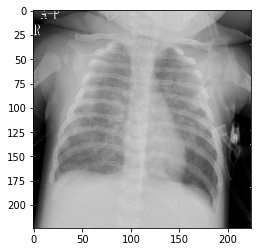

In [52]:
from keras.models import load_model
from keras.preprocessing import image
from tensorflow.keras.applications.densenet import preprocess_input
import numpy as np
model = load_model('densenet100.h5')
img = image.load_img('/ShardDrives/MyDrive/ds/val/image14.png', target_size=(224,224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
img_data = preprocess_input(x)
output = model.predict(img_data)
plt.imshow(img)
output1 = { 0:'Bacteria',1:'Normal',2:'Viral'}
print("the output Image is ",output1[np.argmax(output)])

In [53]:
output

array([[0.29341546, 0.00584517, 0.7007393 ]], dtype=float32)

In [54]:
from sklearn.metrics import accuracy_score

vgg_acc = accuracy_score(test_set.classes, y_pred)
print("Densenet121 Model Accuracy with Fine-Tuning: {:.2f}%".format(vgg_acc * 100))

Densenet121 Model Accuracy with Fine-Tuning: 79.90%


In [55]:
from google.colab import files
files.download("densenet100.h5")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>